# - 철도에서 사고가 났을 때 차종들간의 상관관계

In [13]:
import warnings

warnings.filterwarnings(action='ignore') 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
railroad = pd.read_excel('C:\\Users\\LG\Desktop\\빅데이터\\과제\\시흥시 프로젝트\\철도-차종.xlsx')
railroad

,car,ban,lorry,specialcar,two-wheeled vehicle,prime mover,bicycle,construction machinery,farm machinery,railroad
0,1588,177,329,10,91,28,13,19,0,0
1,1480,171,304,14,71,23,22,15,1,0
2,1474,187,357,9,83,33,22,15,0,0
3,1307,170,286,12,59,31,17,15,0,0
4,1286,141,332,4,46,32,31,23,0,0
5,1549,172,364,6,59,53,35,21,1,0
6,1452,161,302,10,66,50,36,38,0,1
7,1435,147,354,19,81,27,42,30,0,0
8,1569,159,392,22,133,21,47,39,1,0
9,1451,126,378,25,154,50,57,23,1,0


In [15]:
# X, Y 분할하기
Y = railroad['railroad']
X = railroad.drop(['railroad'], axis=1, inplace=False)

In [16]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [17]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [18]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [19]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [20]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.333, RMSE : 0.577
R^2(Variance score) : -0.500


In [21]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  0.0
회귀 계수 값:  [0. 0. 0. 0. 0. 0. 0. 0. 0.]


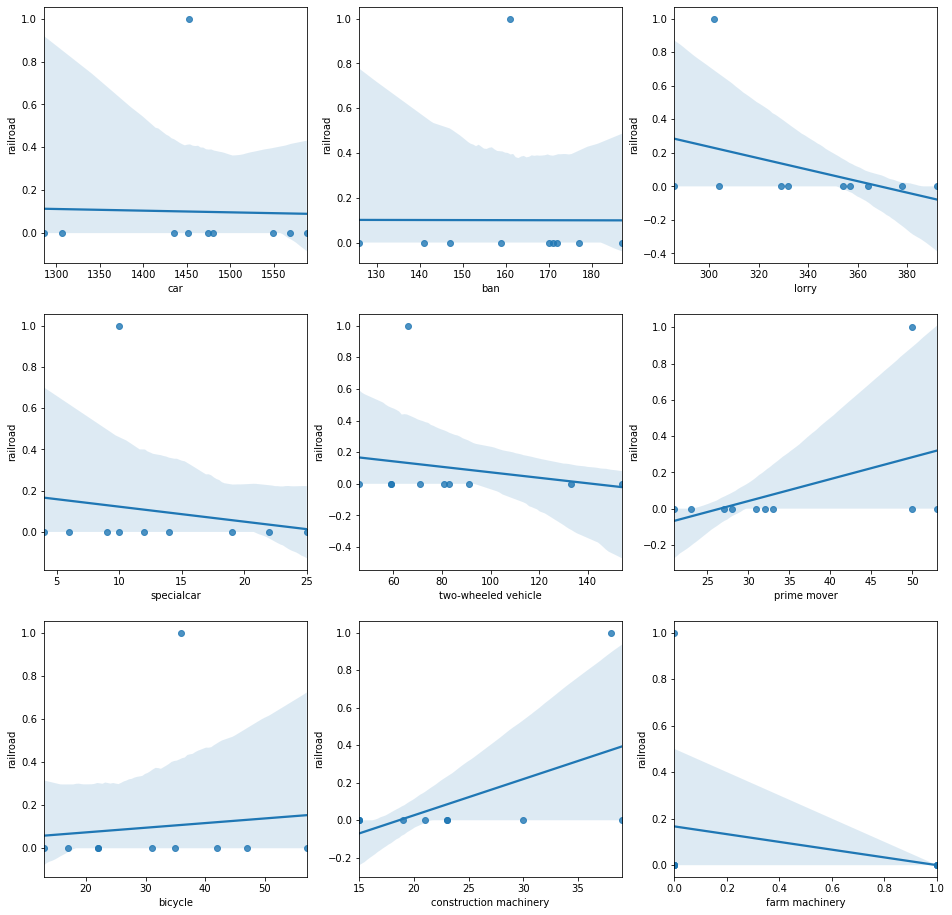

In [22]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=3)

x_features = ['car', 'ban', 'lorry', 'specialcar', 'two-wheeled vehicle', 'prime mover', 'bicycle', 'construction machinery', 'farm machinery']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='railroad', data=railroad, ax=axs[row][col])